<a href="https://colab.research.google.com/github/Brijeshtanwar/Topic-Modeling/blob/main/sklearn_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
import seaborn as sns
pd.set_option('display.max_columns', None)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# NLP libraries
import nltk
import re
# nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
oversample = RandomOverSampler(sampling_strategy='minority')

In [2]:
url = """https://raw.githubusercontent.com/Brijeshtanwar/Topic-Modeling/main/voc_data.csv"""
df = pd.read_csv(url)

In [3]:
df = df[['CUSTOMER COMMENT', 'Reason']]
df.columns = ['x', 'y']

In [4]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [5]:
# Drop na 
df.dropna(axis=0, inplace=True)

In [6]:
df.y.value_counts()

SERVICE                      335
APPLICATION (WEB/APP)        262
NOT SPECIFIED                126
CHARGES(BRO./DP/LPC ETC.)     55
PEOPLE                        16
PROCESS                        3
Name: y, dtype: int64

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='count', ylabel='y'>

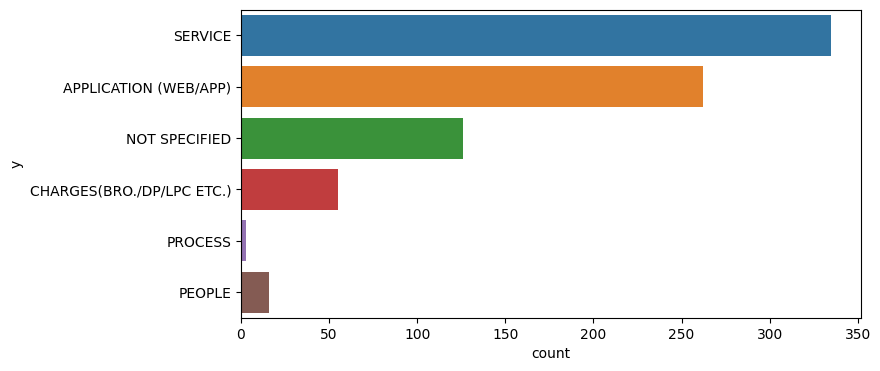

In [7]:
plt.figure(figsize=[8,4])
sns.countplot(y=df['y'])

In [8]:
# Preprocessing

In [9]:
# Remove integer comments
df = df[df['x'].apply(lambda x: not isinstance(x, int))]
df.reset_index(drop=True, inplace=True)

#lower case
df['x'] = df['x'].str.lower()

# Keep only alphabets
for i in range(0, len(df['x'])):
    text = re.sub("[^A-Za-z]+", ' ', df['x'][i])

In [10]:
# Dict for classes
df['category_id'] = df['y'].factorize()[0]
category_id_df = df[['y', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'y']].values)

In [11]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVector = TfidfVectorizer(sublinear_tf=True, min_df=20, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidfVector.fit_transform(df['x']).toarray()
labels = df.category_id
features.shape

(797, 41)

In [14]:
pd.DataFrame(features.transpose(),index=tfidfVector.get_feature_names_out()).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796
account,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56451,0.310980,0.0,0.0,0.0,0.0,0.588097,0.0,0.0,0.678057,0.000000,0.000000,0.0,0.0,0.458672,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,0.686257,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.313757,0.000000,0.0,0.000000,0.0,0.0,0.0,0.653075,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.443401,0.00000,0.000000,0.000

In [16]:
# smt = SMOTETomek(sampling_strategy = 'auto', random_state=42)
# X, y = smt.fit_resample(features, labels)

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto',random_state=42,k_neighbors=2)
X, y = sm.fit_resample(features, labels)

In [18]:
df_smote = pd.DataFrame(X)

In [19]:
y.value_counts()

0    335
1    335
2    335
3    335
4    335
5    335
Name: category_id, dtype: int64

In [20]:
X_train = X
Y_train = y

In [25]:
labels == 0

0       True
1      False
2      False
3      False
4       True
       ...  
792     True
793    False
794    False
795    False
796    False
Name: category_id, Length: 797, dtype: bool

In [24]:
# We can use sklearn.feature_selection.chi2 to find the terms that are the most correlated with each of the products:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for i, j in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == j)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidfVector.get_feature_names_out())[indices]
    print(feature_names)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(i))
    # print(feature_names)
    print(" Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print(" Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

['experience' 'need' 'poor' 'solve' 'times' 'kotak' 'account' 'dont'
 'days' 'bad' 'market' 'worst' 'securities' 'issue' 'time'
 'kotak securities' 'care' 'problem' 'high' 'good' 'improve' 'query'
 'like' 'platform' 'charges' 'dealer' 'support' 'customer service' 'trade'
 'glitches' 'customer' 'brokerage' 'technical' 'trading' 'application'
 'service' 'loss' 'working' 'neo' 'order' 'app']
# 'APPLICATION (WEB/APP)':
 Most correlated unigrams:
. order
. app
 Most correlated bigrams:
. kotak securities
. customer service
['customer service' 'poor' 'experience' 'market' 'worst' 'trade' 'time'
 'times' 'bad' 'support' 'service' 'account' 'order' 'care' 'customer'
 'issue' 'dont' 'loss' 'dealer' 'kotak' 'like' 'glitches' 'neo'
 'securities' 'days' 'technical' 'solve' 'application' 'working' 'good'
 'kotak securities' 'problem' 'query' 'need' 'improve' 'trading' 'app'
 'platform' 'high' 'charges' 'brokerage']
# 'CHARGES(BRO./DP/LPC ETC.)':
 Most correlated unigrams:
. charges
. brokerage
 Mos

<Axes: xlabel='model_name', ylabel='accuracy'>

<Axes: xlabel='model_name', ylabel='accuracy'>

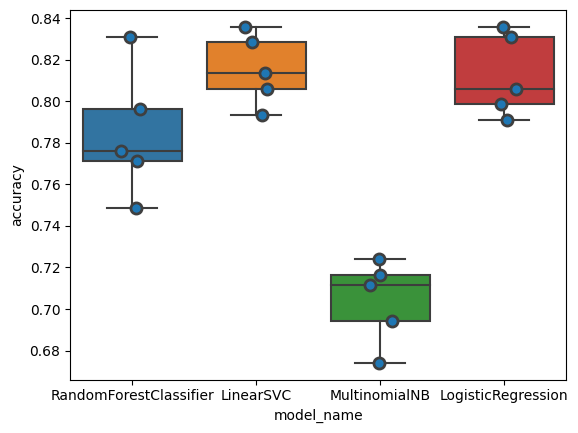

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X_train, Y_train, scoring='accuracy',cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [47]:
y.shape

(2010,)

In [53]:
from sklearn.model_selection import train_test_split
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, df_smote.index, test_size=0.33, stratify=y, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LinearSVC()

<Axes: >

Text(33.22222222222221, 0.5, 'Actual')

Text(0.5, 25.722222222222214, 'Predicted')

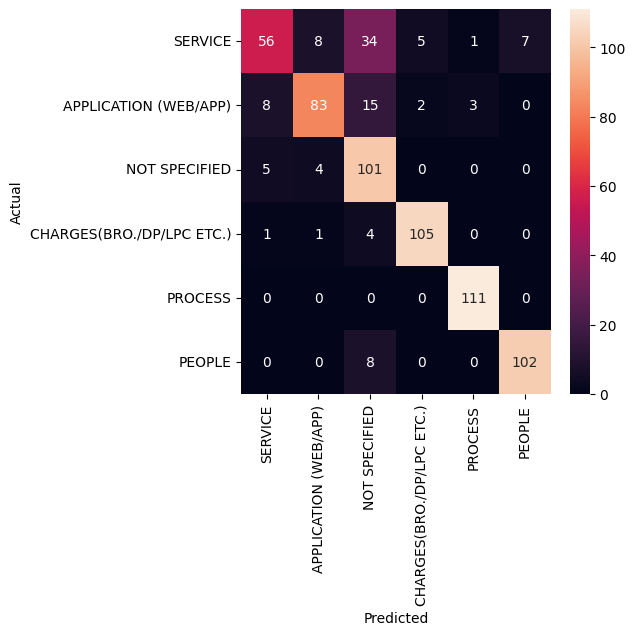

In [54]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.y.values, yticklabels=category_id_df.y.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [30]:
# y_pred_overall = model.predict(X)

<Axes: >

Text(33.22222222222221, 0.5, 'Actual')

Text(0.5, 25.722222222222214, 'Predicted')

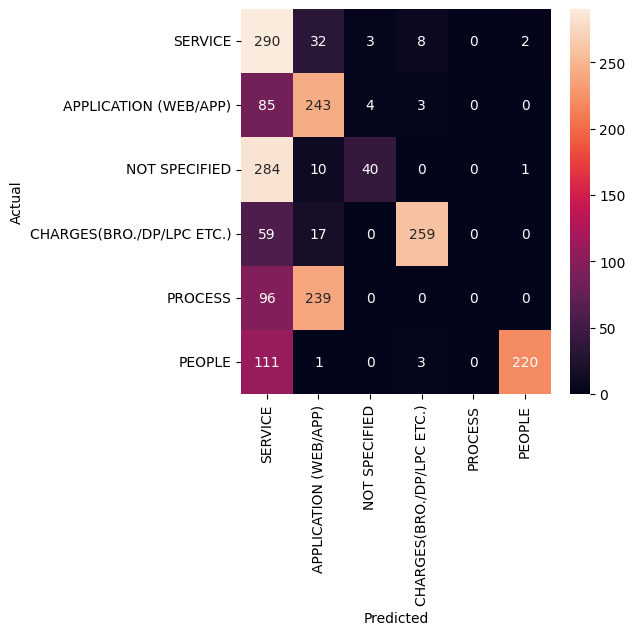

In [31]:
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y, y_pred_overall)
# fig, ax = plt.subplots(figsize=(5,5))
# sns.heatmap(conf_mat, annot=True, fmt='d',
#             xticklabels=category_id_df.y.values, yticklabels=category_id_df.y.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [57]:
# To manually verify why some failed
from IPython.display import display

for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 6:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
            display(df_smote.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['y', 'x']])
            print('')

'APPLICATION (WEB/APP)' predicted as 'SERVICE' : 8 examples.


KeyError: ignored

In [58]:
# Classification report
from sklearn import metrics
print(metrics.classification_report(y, y_pred_overall, target_names=df['y'].unique()))

                           precision    recall  f1-score   support

                  SERVICE       0.31      0.87      0.46       335
    APPLICATION (WEB/APP)       0.45      0.73      0.55       335
            NOT SPECIFIED       0.85      0.12      0.21       335
CHARGES(BRO./DP/LPC ETC.)       0.95      0.77      0.85       335
                  PROCESS       0.00      0.00      0.00       335
                   PEOPLE       0.99      0.66      0.79       335

                 accuracy                           0.52      2010
                macro avg       0.59      0.52      0.48      2010
             weighted avg       0.59      0.52      0.48      2010



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
